<a href="https://colab.research.google.com/github/Shinhuynry/Drowsiness_Detection/blob/main/DrowsinessDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo thư viện để đọc ảnh 
from os import listdir
import random

#Khai báo thư viện tính ma trận cho ảnh và vẽ đồ thị ảnh                                                                                                                                                                                                                                                                                                 
import numpy as np
import matplotlib.pyplot as plt

#Khai báo các biến thể hiện giá trị kích thước, số lần học và số lớp
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import LeakyReLU

#Khai báo thư viện chọn phương pháp tối ưu và hàm mất mát
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder = "/content/drive/MyDrive/Dataset/Drowsiness Detection/Train/"
photos, labels = list(), list()
output = 0
for file in listdir(folder):
  if file.startswith("CloseEye"):
    output = 0
  if file.startswith("OpenEye"):
    output = 1
  img = load_img(folder+file, target_size=(160, 160))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

In [ ]:
union_list = list(zip(photos, labels))
random.shuffle(union_list)
photos,labels = zip(*union_list)

In [ ]:
# Chuyển hình ảnh về dạng mảng
X_train = np.array(photos)
y_train = np.array(labels)

In [ ]:
# Hiển thị kích thước ảnh
X_train.shape, y_train.shape

((3209, 160, 160, 3), (3209,))

In [ ]:
folder = "/content/drive/MyDrive/Dataset/Drowsiness Detection/Test/"
photos, labels = list(), list()
output = 0
for file in listdir(folder):
  if file.startswith("CloseEye"):
    output = 0
  if file.startswith("OpenEye"):
    output = 1
  img = load_img(folder+file, target_size=(160, 160))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

In [ ]:
union_list = list(zip(photos, labels))
random.shuffle(union_list)
photos,labels = zip(*union_list)

In [ ]:
# Chuyển hình ảnh về dạng mảng
X_test = np.array(photos)
y_test = np.array(labels)

In [ ]:
# Hiển thị kích thước ảnh
X_test.shape, y_test.shape

((800, 160, 160, 3), (800,))

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
# Khai báo số giá trị mỗi lần học, số lần học và số loại 
batch_size = 32
epochs = 10
classes = 2

In [ ]:
# Phân lớp cho giá trị
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test,classes)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Góc xoay ảnh trong khoảng [-20, 20] độ
    width_shift_range=0.1,  # Phạm vi dịch chuyển ngang (từ 0 đến 1)
    height_shift_range=0.1,  # Phạm vi dịch chuyển dọc (từ 0 đến 1)
    shear_range=0.2,  # Góc cắt ảnh
    zoom_range=0.2,  # Phạm vi thu phóng ảnh
    horizontal_flip=True,  # Lật ảnh theo chiều ngang
    fill_mode='nearest'  # Phương pháp điền các pixel bị thiếu sau biến đổi
)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
# Tạo các lớp cho model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (160,160,3), padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 160, 160, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 80, 80, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                    

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(augmented_data, epochs = epochs)

Epoch 1/10
101/101 [==============================] - 146s 1s/step - loss: 0.6507 - accuracy: 0.6937
Epoch 2/10
101/101 [==============================] - 145s 1s/step - loss: 0.2547 - accuracy: 0.9018
Epoch 3/10
101/101 [==============================] - 147s 1s/step - loss: 0.2488 - accuracy: 0.9155
Epoch 4/10
101/101 [==============================] - 145s 1s/step - loss: 0.1558 - accuracy: 0.9464
Epoch 5/10
101/101 [==============================] - 147s 1s/step - loss: 0.1018 - accuracy: 0.9660
Epoch 6/10
101/101 [==============================] - 147s 1s/step - loss: 0.1597 - accuracy: 0.9467
Epoch 7/10
101/101 [==============================] - 140s 1s/step - loss: 0.1429 - accuracy: 0.9520
Epoch 8/10
101/101 [==============================] - 144s 1s/step - loss: 0.0937 - accuracy: 0.9713
Epoch 9/10
101/101 [==============================] - 145s 1s/step - loss: 0.0544 - accuracy: 0.9797
Epoch 10/10
101/101 [==============================] - 142s 1s/step - loss: 0.0594 - accura

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DrowsinessDetection.h5', overwrite=True)

1/1 [==============================] - 0s 51ms/step
OpenEye


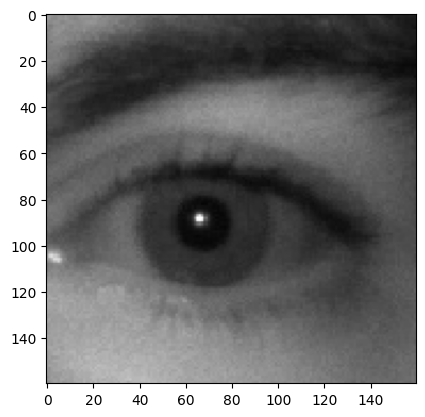

In [ ]:
# Đường dẫn file hình cần dự đoán
img_resize = load_img('/content/drive/MyDrive/Dataset/Drowsiness Detection/Test/OpenEyes (43).png', target_size=(160,160))
#img_resize1 = img_resize.convert("L")
plt.imshow(img_resize)
img_gray = img_to_array(img_resize)
img_gray = img_gray.reshape(1,160,160,3)
img_gray = img_gray.astype('float32')/255.0
giatri = np.argmax(model.predict(img_gray), axis=-1)
if (giatri == 0) :
  print('CloseEye')
if (giatri == 1) :
  print('OpenEye')